# VOGDB EDA
Exploring VOGs from [VOGDB](http://www.vogdb.org/download).


In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load and view VOGDB files
* **vog.members.tsv.gz**, Tab separated file of VOGs and the comma separated lists of their member protein ids.
* **vog.annotations.tsv.gz**, Tab separated file of VOGs and their consensus functional annotations (preferrably from Swissprot annotations, if not available then the annotations from RefSeq were used).
* **vog.lca.tsv.gz**, Tab separated file of VOGs and the taxonomic lineage of the last common ancestor (LCA) of member genomes. Genomes with unclassified taxonomic lineages have not been used for LCA determination, which can result in VOG without LCA (if all proteins of a VOG are from unclassified lineages). The numbers of genomes per VOG and LCA, as well as the total numbers of genomes in the LCA are given.

In [2]:
# Path to VOGDB files
vogdb_files = '/home/alepfu/Desktop/VOGDB_files/'

# Filenames
vogdb_file_members = 'vog.members.tsv'
vogdb_file_annotations = 'vog.annotations.tsv'
vogdb_file_lca = 'vog.lca.tsv'

# Load data
vogdb_members_df = pd.read_csv(vogdb_files + vogdb_file_members, sep='\t')
vogdb_annotations_df = pd.read_csv(vogdb_files + vogdb_file_annotations, sep='\t')
vogdb_lca_df = pd.read_csv(vogdb_files + vogdb_file_lca, sep='\t')

In [3]:
n_vogs = vogdb_members_df.shape[0]
print('Number of VOGs:', n_vogs)

Number of VOGs: 25400


## VOGDB members

In [4]:
vogdb_members_df.head()

,#GroupName,ProteinCount,SpeciesCount,FunctionalCategory,ProteinIDs
0,VOG00001,743,36,Xh,"1560514.YP_009094638.1,1720526.YP_009310212.1,..."
1,VOG00002,569,69,Xh,"10506.NP_049038.1,1269028.YP_007354781.1,10245..."
2,VOG00003,704,161,Xu,"1675866.YP_009357223.1,320432.YP_249674.1,1592..."
3,VOG00004,618,509,Xu,"2041855.YP_009639449.1,2560719.YP_009639326.1,..."
4,VOG00005,877,689,XhXrXs,"1922558.YP_009333546.1,1923610.YP_009336918.1,..."


In [5]:
print('Number of NaN cells:', vogdb_members_df.isna().sum().sum())

Number of NaN cells: 0


In [6]:
vogdb_members_df[['ProteinCount','SpeciesCount']].describe()

,ProteinCount,SpeciesCount
count,25400.000000,25400.000000
mean,12.005197,11.183622
std,44.590497,39.074229
min,2.000000,2.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,8.000000,7.000000
max,1973.000000,1835.000000


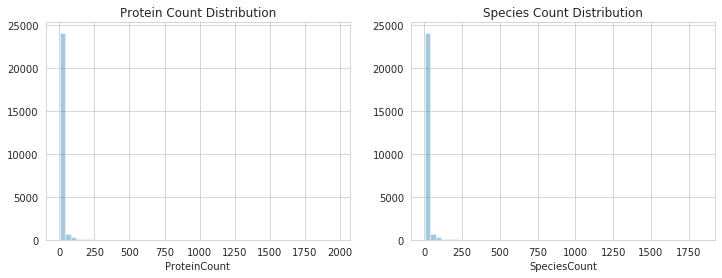

In [7]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax = sns.distplot(vogdb_members_df['ProteinCount'], kde=False)
plt.title('Protein Count Distribution')

plt.subplot(1, 2, 2)
ax = sns.distplot(vogdb_members_df['SpeciesCount'], kde=False)
plt.title('Species Count Distribution')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most groups are small.
</span>

In [8]:
vogdb_members_df['Xr'] = vogdb_members_df['FunctionalCategory'].str.contains('Xr').astype(int)
vogdb_members_df['Xs'] = vogdb_members_df['FunctionalCategory'].str.contains('Xs').astype(int)
vogdb_members_df['Xh'] = vogdb_members_df['FunctionalCategory'].str.contains('Xh').astype(int)
vogdb_members_df['Xp'] = vogdb_members_df['FunctionalCategory'].str.contains('Xp').astype(int)
vogdb_members_df['Xu'] = vogdb_members_df['FunctionalCategory'].str.contains('Xu').astype(int)

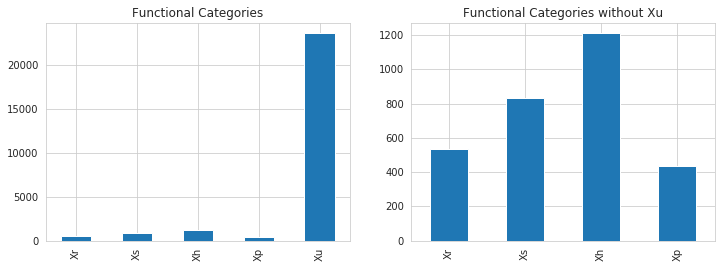

In [9]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax = vogdb_members_df[['Xr','Xs','Xh','Xp','Xu']].sum().plot.bar()
plt.title('Functional Categories')

plt.subplot(1, 2, 2)
ax = vogdb_members_df[['Xr','Xs','Xh','Xp']].sum().plot.bar()
plt.title('Functional Categories without Xu')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most groups are poorly characterized.
</span>

## Top 1% VOGDB members

Exploring the top 1% of VOGs having the most proteins or species.

In [10]:
n_top_vogs = int(n_vogs / 100)
print('Number of top 1% of VOGs:', n_top_vogs)

Number of top 1% of VOGs: 254


In [11]:
vogdb_top_proteins_members_df = vogdb_members_df.sort_values('ProteinCount', ascending=False).head(n_top_vogs)
vogdb_top_proteins_members_df[['ProteinCount']].describe()

,ProteinCount
count,254.000000
mean,326.531496
std,275.064184
min,138.000000
25%,168.250000
50%,221.500000
75%,395.500000
max,1973.000000


In [12]:
vogdb_top_species_members_df = vogdb_members_df.sort_values('SpeciesCount', ascending=False).head(n_top_vogs)
vogdb_top_species_members_df[['SpeciesCount']].describe()

,SpeciesCount
count,254.000000
mean,290.224409
std,233.062819
min,123.000000
25%,158.000000
50%,206.500000
75%,336.250000
max,1835.000000


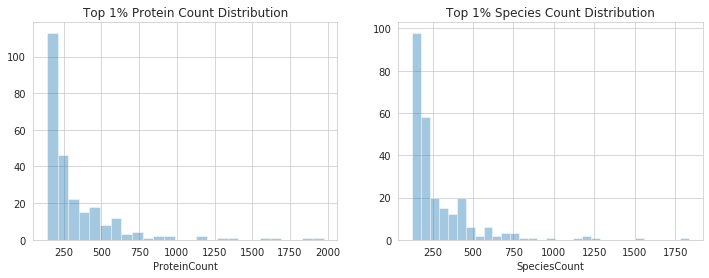

In [13]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = sns.distplot(vogdb_top_proteins_members_df['ProteinCount'], kde=False)
plt.title('Top 1% Protein Count Distribution')

plt.subplot(1, 2, 2)
ax = sns.distplot(vogdb_top_species_members_df['SpeciesCount'], kde=False)
plt.title('Top 1% Species Count Distribution')

plt.show()

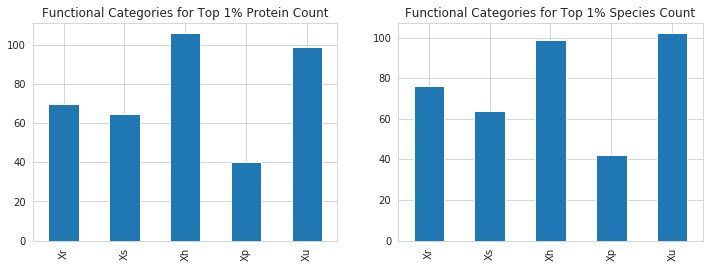

In [14]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = vogdb_top_proteins_members_df[['Xr','Xs','Xh','Xp','Xu']].sum().plot.bar()
plt.title('Functional Categories for Top 1% Protein Count')

plt.subplot(1, 2, 2)
ax = vogdb_top_species_members_df[['Xr','Xs','Xh','Xp','Xu']].sum().plot.bar()
plt.title('Functional Categories for Top 1% Species Count')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
The characterization for large groups is better.
</span>

## VOGDB annotations

In [15]:
vogdb_annotations_df.head()

,#GroupName,ProteinCount,SpeciesCount,FunctionalCategory,ConsensusFunctionalDescription
0,VOG00001,743,36,Xh,sp|Q5UQJ2|YR863_MIMIV Putative ankyrin repeat ...
1,VOG00002,569,69,Xh,sp|Q9J4Z6|V244_FOWPN Putative ankyrin repeat p...
2,VOG00003,704,161,Xu,sp|Q91FD6|388R_IIV6 Putative MSV199 domain-con...
3,VOG00004,618,509,Xu,sp|P51704|RPC1_BPHC1 Repressor protein CI
4,VOG00005,877,689,XhXrXs,sp|P17766|POLG_PPVNA Genome polyprotein


In [16]:
print('Number of NaN cells:', vogdb_annotations_df.isna().sum().sum())

Number of NaN cells: 0


In [17]:
vogdb_annotations_df['SwissProt'] = vogdb_annotations_df['ConsensusFunctionalDescription'].str.startswith('sp').astype(int)
vogdb_annotations_df['Refseq'] = vogdb_annotations_df['ConsensusFunctionalDescription'].str.startswith('REFSEQ').astype(int)

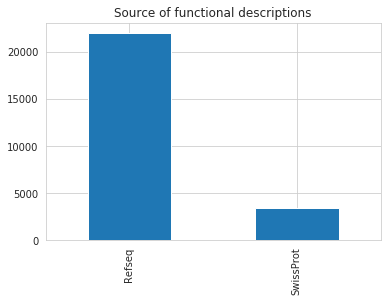

In [18]:
ax = vogdb_annotations_df[['Refseq','SwissProt']].sum().plot.bar()
plt.title('Source of functional descriptions')
plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most annotations come from Refseq, which is the fallback.
</span>

## VOGDB LCA

In [19]:
vogdb_lca_df.head()

,#GroupName,GenomesInGroupAndLCA,GenomesTotalInLCA,LastCommonAncestor
0,VOG00001,20,6131,Viruses
1,VOG00002,59,6131,Viruses
2,VOG00003,153,6131,Viruses
3,VOG00004,505,6131,Viruses
4,VOG00005,342,1683,Viruses;Riboviria


In [20]:
vogdb_lca_df[['GenomesInGroupAndLCA','GenomesTotalInLCA']].describe()

,GenomesInGroupAndLCA,GenomesTotalInLCA
count,25400.000000,25400.000000
mean,10.719803,965.066299
std,38.081363,1687.287043
min,0.000000,1.000000
25%,2.000000,5.000000
50%,3.000000,48.000000
75%,7.000000,1343.000000
max,1833.000000,6131.000000


In [21]:
print('Number of NaN cells:', vogdb_lca_df.isna().sum().sum())

Number of NaN cells: 1222


In [22]:
print('NaN columns:', vogdb_lca_df.columns[vogdb_lca_df.isna().any()].tolist())

NaN columns: ['LastCommonAncestor']


In [23]:
def count_taxonomic_levels(lca):
    """Counts terms in LCA column to quantify taxonomic accuracy."""
    n_levels = -1;
    
    if (pd.isnull(lca)):
        n_levels = 0
    elif (lca == 'Viruses'):
        n_levels = 1
    else:
        n_levels = lca.count(';') + 1
        
    return n_levels


vogdb_lca_df['N_taxonomic_levels'] = vogdb_lca_df.apply(lambda row: count_taxonomic_levels(row['LastCommonAncestor']), axis=1)

print('Is there an undefined taxonomic level count?', -1 in vogdb_lca_df['N_taxonomic_levels'])

Is there an undefined taxonomic level count? False


In [24]:
vogdb_lca_df['N_taxonomic_levels'].describe()

count    25400.000000
mean         3.269016
std          1.260271
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: N_taxonomic_levels, dtype: float64

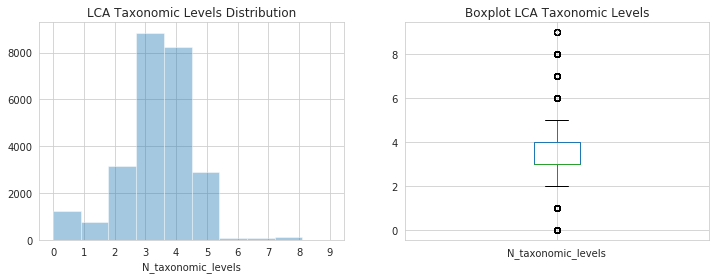

In [25]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = sns.distplot(vogdb_lca_df['N_taxonomic_levels'], kde=False, bins=10)
plt.title('LCA Taxonomic Levels Distribution')
plt.xticks(np.arange(0, 10, 1.0))

plt.subplot(1, 2, 2)
ax = vogdb_lca_df.boxplot(column='N_taxonomic_levels')
plt.title('Boxplot LCA Taxonomic Levels')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
Most groups have only a broad lineage.
</span>

## Top 1% VOGDB LCA

Exploring the top 1% of VOGs having the most genomes.

In [54]:
vogdb_top_genomes_lca_df = vogdb_lca_df.sort_values('GenomesInGroupAndLCA', ascending=False).head(n_top_vogs)
vogdb_top_genomes_lca_df[['GenomesInGroupAndLCA']].describe()

,GenomesInGroupAndLCA
count,254.000000
mean,282.259843
std,226.509943
min,121.000000
25%,152.000000
50%,204.500000
75%,327.000000
max,1833.000000


In [55]:
vogdb_top_genomes_lca_df['N_taxonomic_levels'].describe()

count    254.000000
mean       1.952756
std        0.788838
min        1.000000
25%        1.250000
50%        2.000000
75%        2.000000
max        7.000000
Name: N_taxonomic_levels, dtype: float64

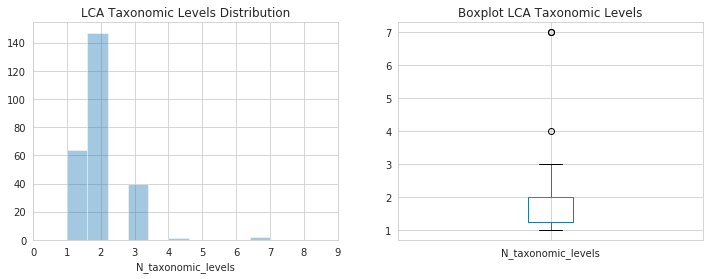

In [56]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = sns.distplot(vogdb_top_genomes_lca_df['N_taxonomic_levels'], kde=False, bins=10)
plt.title('LCA Taxonomic Levels Distribution')
plt.xticks(np.arange(0, 10, 1.0))

plt.subplot(1, 2, 2)
ax = vogdb_top_genomes_lca_df.boxplot(column='N_taxonomic_levels')
plt.title('Boxplot LCA Taxonomic Levels')

plt.show()

<span style="color:darkgreen;font-weight:bold;">
For larger groups, the resolution for the linage drops.
</span>